# ¡Hola Emmanuel! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Emmanuel excelente trabajo completando este proyecto! Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas. 

No obstante, te falta desarrollar una de las tareas propuestas

    Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Hasta el momento has realizado un gran trabajo, sé que podrás hacer los ajustes fácilmente

Estaré atento a tu próxima iteración 👀



</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Emmanuel excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

In [1]:
#Importo las bibliotecas necesarias para este trabajo
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para gráficos más estilizados
import scipy.stats as stats  # Para pruebas estadísticas

In [2]:
#carga del dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
#verifico su estructura
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# Muestra la cantidad de valores nulos por columna
print("Valores ausentes por columna:")
print(df.isnull().sum())

# Muestra el porcentaje de valores nulos por columna
print("\nPorcentaje de valores ausentes por columna:")
print((df.isnull().mean() * 100).round(2))

Valores ausentes por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Porcentaje de valores ausentes por columna:
Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64


* Despues de realizar un analisis sobre los datos ausentes me he percatado de lo siguiente:

- Ventas completas y útiles 
   Las columnas de ventas por región no tienen datos faltantes, lo cual es ideal para analizar el rendimiento comercial global de los videojuegos.

- Muchos datos perdidos en puntuaciones y clasificaciones:  
Más del 40% de los registros no tienen "critic_score", "user_score" o "rating", lo que podría afectar los análisis relacionados con la calidad percibida de los juegos.

- Muy pocos datos faltantes en columnas clave como "name", "genre" y "year_of_release" 
   Esto te permite limpiarlas fácilmente sin perder casi nada de información valiosa.

* Qué puedo hacer al respecto?...

* Con columnas con pocos datos ausentes:
  En este caso tenemos 2 opciones, ya sea...

- Eliminar esas filas directamente, ya que son muy pocas.
- Rellenarlas si tienes lógica para hacerlo, por ejemplo: si un juego aparece en varias plataformas, tal vez puedas deducir su año de lanzamiento.

* Con columnas con muchos valores ausentes:
- Si no son esenciales para el análisis actual, lo que se puede hacer es prescindir de ellas temporalmente.
- Si decido mantenerlas, puedo:
  - Rellenar "critic_score" o "user_score" usando el promedio o mediana de juegos similares por género o consola.
  - Rellenar "rating" usando la categoría más común según la plataforma.
- Otra opción es crear un subconjunto con filas completas para estudiar la relación entre puntuaciones y ventas sin ruido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy bien planteada la etapa inicial del análisis. Has hecho una carga limpia del dataset, seguido de una verificación detallada de su estructura y valores ausentes. Además, mostrar tanto el conteo como el porcentaje de nulos por columna es una excelente práctica para tomar decisiones informadas sobre la limpieza

</div>

In [5]:
#eliminar los valores faltantes o rellenarlo
df.columns = df.columns.str.lower() #como algunas estan con letras mayusculas lo mejor y mas practico es pasarlas a minusculas

df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].fillna(df['user_score'].median(), inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
print(df.columns) # de esta manera compruebo que toodo este en minusculas como queria 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

el tipo de dato que tiene "year_of_release" es "float64" cuando debería ser de tipo "int64", por lo tanto debe de cambiarse.

In [7]:
df = df[pd.to_numeric(df['year_of_release'], errors='coerce').notnull()].copy()
df['year_of_release'] = df['year_of_release'].astype(int)
print(df.dtypes)
print()
df.dropna(subset=['name', 'genre'], inplace=True)
print(df.isnull().sum())  # Revisar si aún quedan valores ausentes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien hecho! Has realizado una limpieza detallada de los datos: cambiaste correctamente nombres de columnas a minúsculas, gestionaste valores faltantes con medianas y moda, reemplazaste cadenas no numéricas como 'tbd', y convertiste tipos de datos de forma precisa. Además, demuestras atención es clave asegurar que year_of_release pase de float a int después de depurar los valores nulos. Esta es una base sólida para cualquier análisis posterior. 

</div>

In [8]:
#creacion de la columna "total_sales"
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df[['name', 'platform', 'total_sales']].head()

,name,platform,total_sales
0,Wii Sports,Wii,82.54
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.38


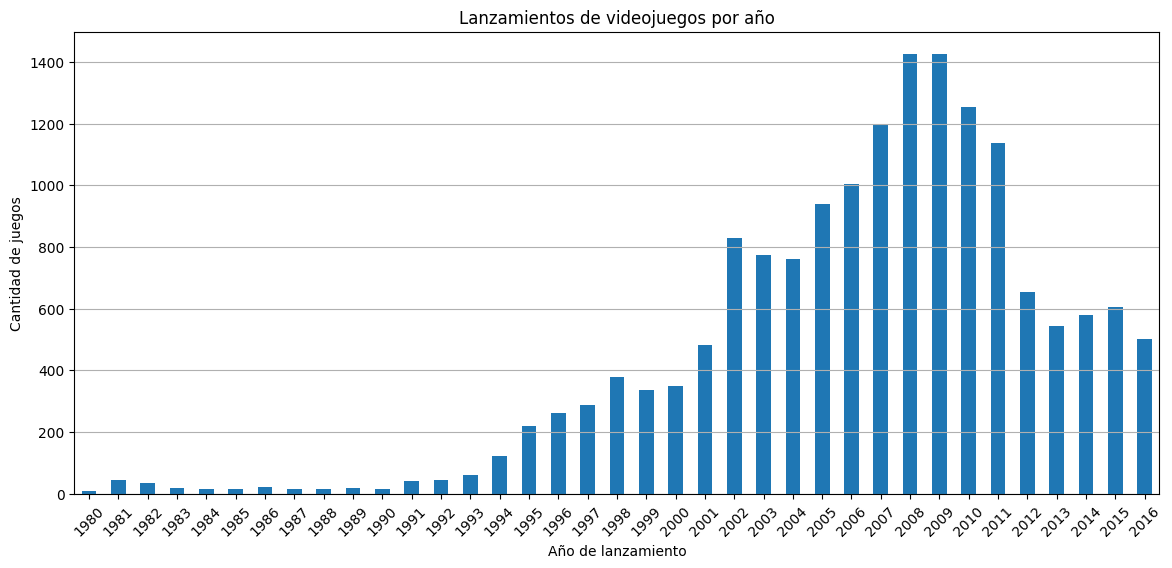

In [9]:
games_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
games_per_year.plot(kind='bar')
plt.title('Lanzamientos de videojuegos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

La industria de los videojuegos vivió un fuerte crecimiento en la cantidad de títulos publicados desde principios de los 2000. Alcanzó su punto máximo alrededor de 2008, con más de 1400 lanzamientos en ese año. A partir de entonces, la producción comenzó a descender de forma gradual hasta 2016, lo que podría reflejar una consolidación del mercado, mayor enfoque en calidad sobre cantidad o transformaciones en el modelo de negocios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis temporal captura muy bien la evolución del volumen de lanzamientos en la industria, y la interpretación que propones sobre la posible consolidación del mercado o cambios en las prioridades estratégicas de las empresas aporta una lectura reflexiva del fenómeno. 

</div>

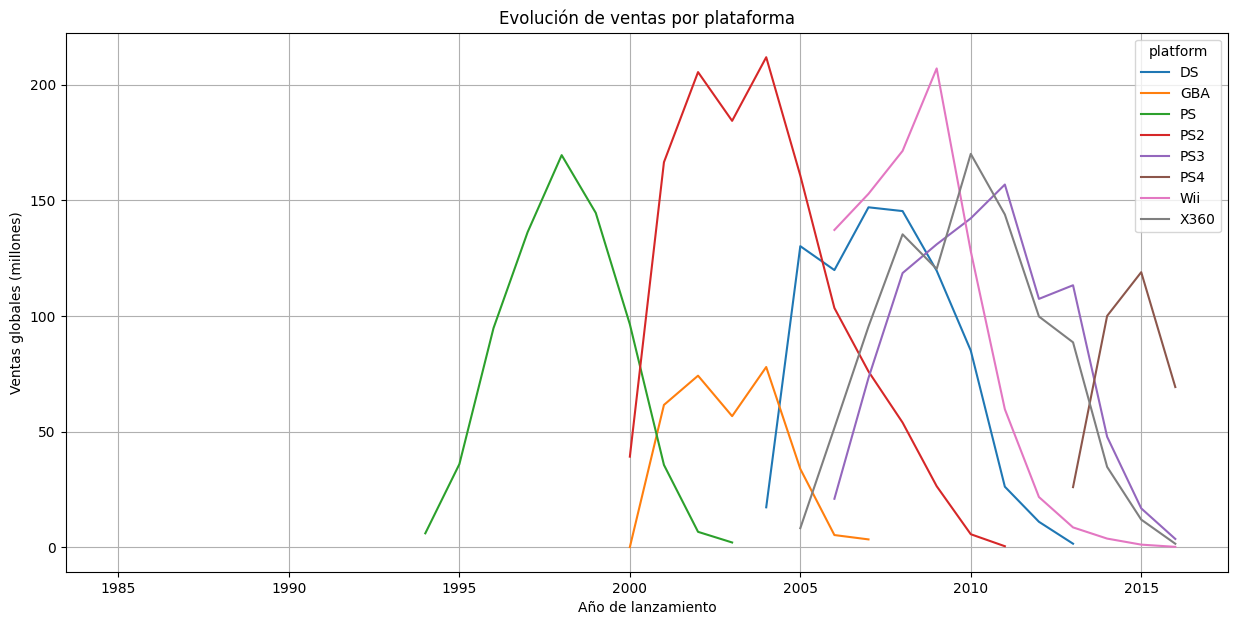

In [10]:
#Total de ventas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(8).index

#Filtrar datos de plataformas principales
df_top = df[df['platform'].isin(top_platforms)]

# Agrupar ventas por año y plataforma
platform_year_sales = df_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Graficar la evolución
platform_year_sales.plot(figsize=(15, 7))
plt.title('Evolución de ventas por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

El análisis temporal de ventas por plataforma revela patrones cíclicos claros. Plataformas como PS2, DS, X360 y Wii fueron líderes durante sus respectivas épocas, pero eventualmente perdieron participación a medida que surgieron nuevas consolas como PS4 y XOne. Dado su reciente crecimiento sostenido, estas últimas plataformas representan oportunidades viables para campañas publicitarias en 2017. Considerando la duración típica de vida de una plataforma, es razonable enfocar el análisis predictivo en datos posteriores a 2012, momento en que comenzaron a emerger las plataformas actualmente dominantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo Emmanuel, tu evaluación temporal permite entender con claridad la rotación generacional de las plataformas y cómo su ciclo de vida condiciona las decisiones estratégicas de marketing.

</div>

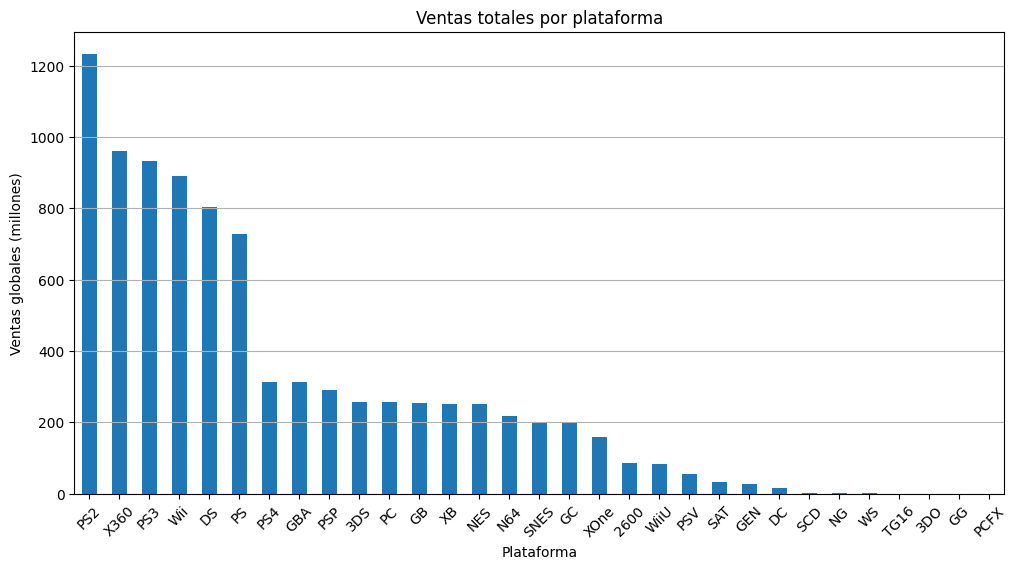

In [11]:
platform_total = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
platform_total.plot(kind='bar')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

El análisis de las ventas globales totales revela que la PS2 es la plataforma más exitosa históricamente, con una ventaja considerable sobre el resto. Le siguen en desempeño las consolas X360, PS3, Wii y DS, lo que indica que las plataformas de Sony, Microsoft y Nintendo dominaron el mercado durante la década analizada. Además, se observa que las plataformas portátiles como DS y GBA también lograron cifras destacadas. Por otro lado, consolas como 3DO, WS o GG registraron ventas mínimas, posiblemente por escasa adopción, la escasa variedad de titulos o por vida útil limitada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! La gráfica muestra claramente que la PlayStation 2 lidera en ventas, seguida por la Xbox 360 y la PlayStation 3. También destacan la Wii, Nintendo DS y la primera PlayStation. Las consolas más antiguas o menos populares tienen ventas mucho menores, lo que refleja la preferencia del mercado por Sony y Microsoft.

</div>

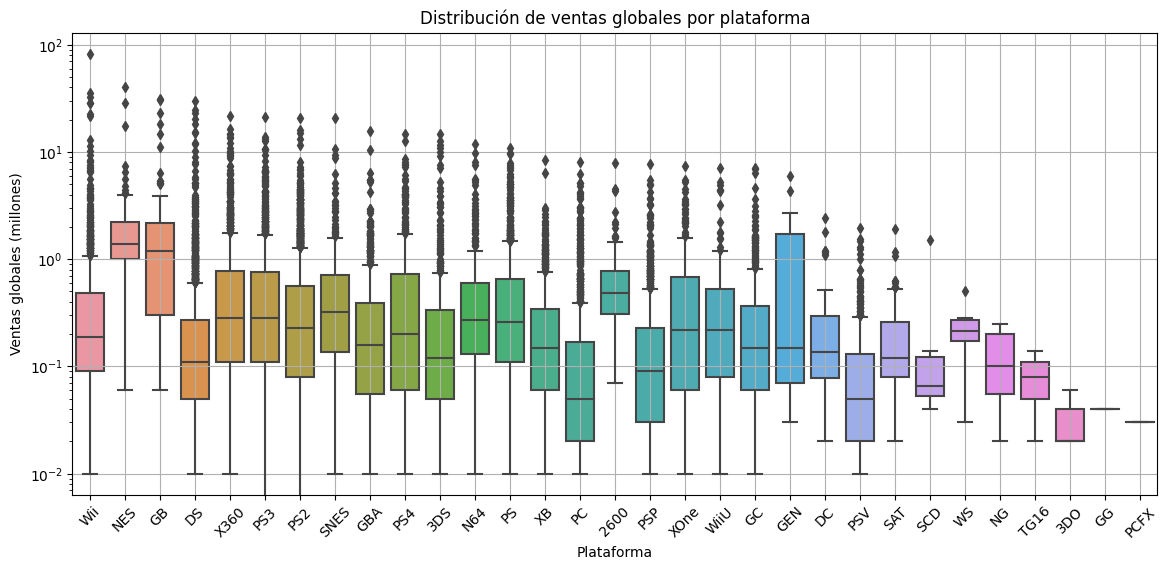

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True)
plt.show()

El diagrama de caja revela que las ventas globales están altamente concentradas: solo unas pocas plataformas como PS3, X360, PS2 y DS presentan distribuciones amplias, con mediana relativamente alta y valores atípicos muy marcados. Esto indica que son plataformas no solo populares, sino también capaces de sostener ventas consistentes entre diversos títulos. Por el contrario, muchas plataformas muestran ventas bajas o dependen de títulos aislados para destacar, lo que las hace menos atractivas comercialmente. Esta información resulta crucial para elegir plataformas rentables en las campañas de marketing planificadas para 2017.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

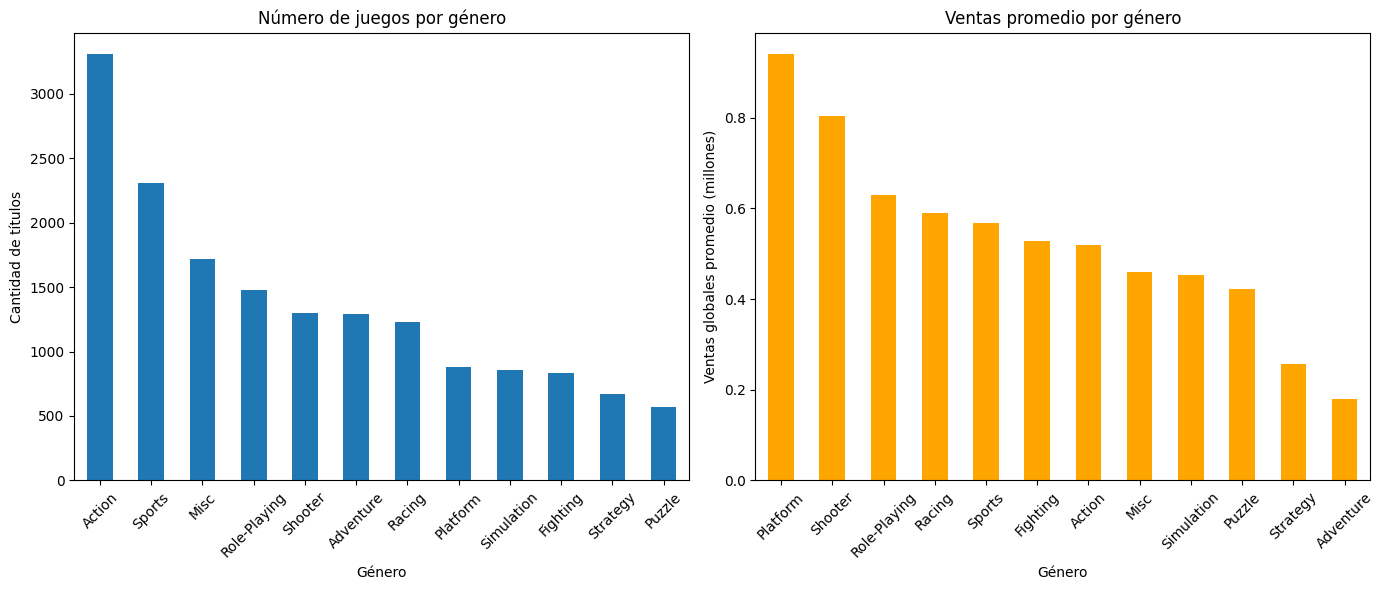

In [13]:
# Número de juegos por género
genre_counts = df['genre'].value_counts()

# Ventas promedio por género
genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Visualización grafica
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
genre_counts.plot(kind='bar')
plt.title('Número de juegos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
genre_sales.plot(kind='bar', color='orange')
plt.title('Ventas promedio por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales promedio (millones)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

El análisis por género revela que la popularidad no siempre garantiza rentabilidad: géneros como Acción y Aventura tienen muchos lanzamientos, pero ventas promedio modestas. En cambio, Platform y Shooter, con menos títulos, destacan por sus altas ventas promedio. Esto indica que, al planificar campañas de marketing en 2017, puede ser más efectivo centrarse en géneros que combinan buen rendimiento comercial y crecimiento potencial, en lugar de seguir únicamente la tendencia de volumen de lanzamientos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Emmanuel es clave la relación que identificas entre cantidad de lanzamientos y rentabilidad por género. Al señalar que géneros como Platform y Shooter, pese a ser menos frecuentes, logran mayores ventas promedio, introduces un criterio más estratégico y matizado para la asignación de recursos publicitarios. Esta mirada te permite ir más allá de las tendencias superficiales y apostar por eficiencia en la inversión.

</div>

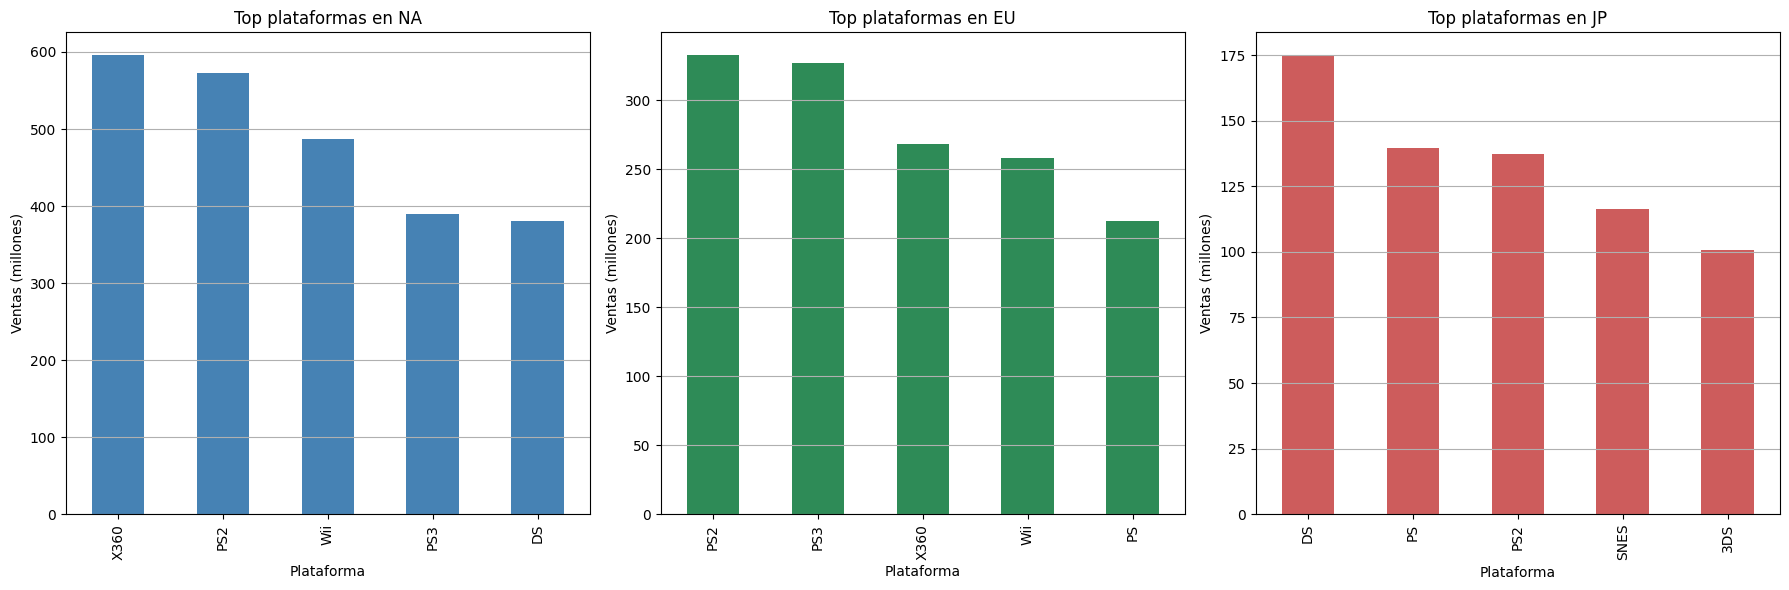

In [14]:
# Ventas por plataforma en cada región
top_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

# Visualización combinada
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

top_na.plot(kind='bar', ax=axs[0], title='Top plataformas en NA', color='steelblue')
top_eu.plot(kind='bar', ax=axs[1], title='Top plataformas en EU', color='seagreen')
top_jp.plot(kind='bar', ax=axs[2], title='Top plataformas en JP', color='indianred')

for ax in axs:
    ax.set_xlabel('Plataforma')
    ax.set_ylabel('Ventas (millones)')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Análisis comparativo por región:

* Norteamérica (NA):
   - "X360" es la plataforma más exitosa, superando incluso a PlayStation.
   - Le siguen "PS2", "Wii", "PS3" y "DS", lo que muestra una fuerte competencia entre Sony, Microsoft y Nintendo.
   - Xbox tiene una presencia mucho más fuerte en este mercado que en los demás.

* Europa (EU):
   - "PlayStation 2" domina las ventas, seguida de cerca por "PS3".
   - "Xbox 360" también se desempeña bien, pero no con la misma ventaja que en NA.
   - El dominio europeo está más inclinado hacia Sony, reflejando una preferencia más clara por sus consolas.

* Japón (JP):
   - Totalmente diferente: aquí "Nintendo DS" es líder indiscutible.
   - Le siguen "PlayStation (PS)", "PS2", "Super Nintendo (SNES)" y "3DS".
   - "Nintendo" domina claramente el mercado japonés, con muy poca presencia de consolas Xbox, lo que confirma el bajo impacto de Microsoft en esa región.

Estas diferencias reflejan particularidades culturales y comerciales en cada región y deben ser consideradas al diseñar estrategias de distribución o campañas de marketing específicas para 2017.

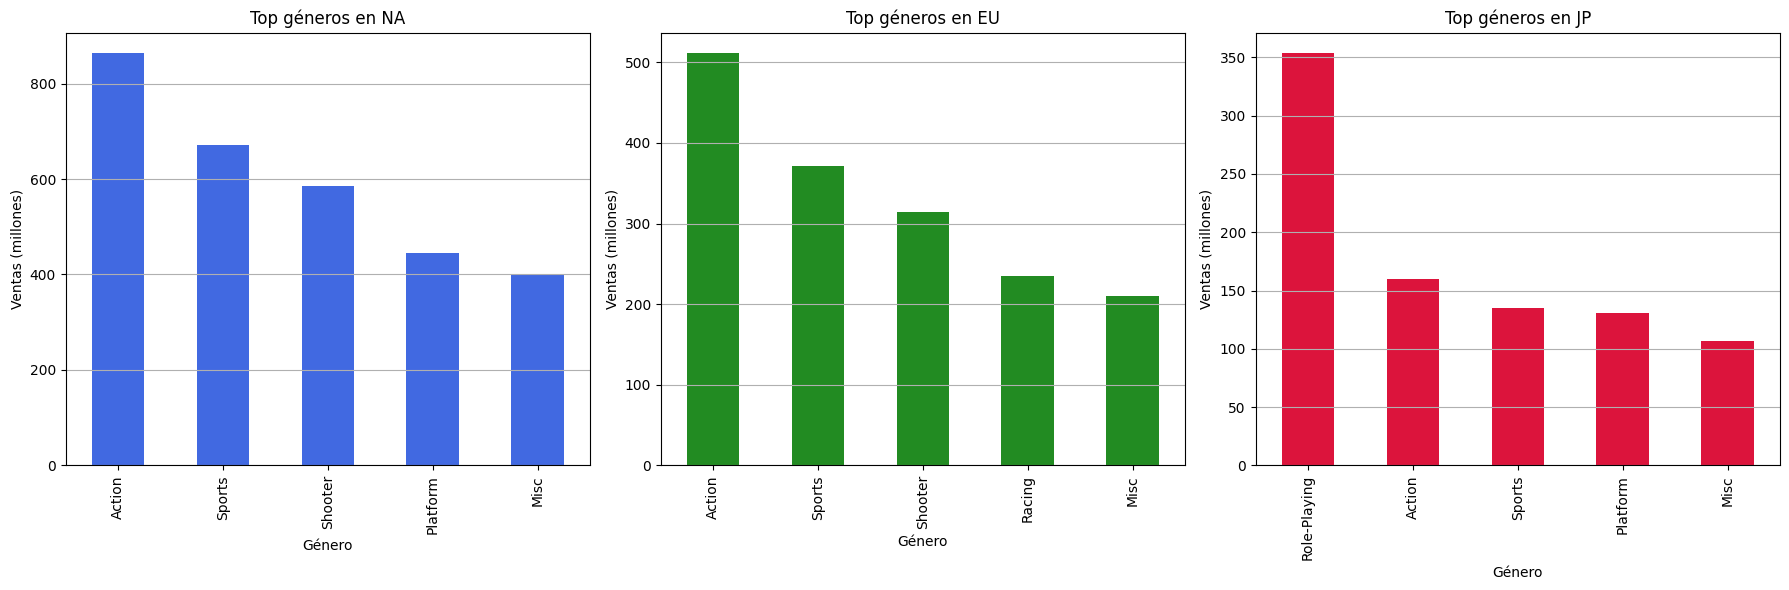

In [15]:
#ventas por género y región
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

#grafico
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

top_genres_na.plot(kind='bar', ax=axs[0], title='Top géneros en NA', color='royalblue')
top_genres_eu.plot(kind='bar', ax=axs[1], title='Top géneros en EU', color='forestgreen')
top_genres_jp.plot(kind='bar', ax=axs[2], title='Top géneros en JP', color='crimson')

for ax in axs:
    ax.set_xlabel('Género')
    ax.set_ylabel('Ventas (millones)')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Análisis de géneros más vendidos por región:

* Norteamérica (NA):
   - Dominado por géneros de ritmo rápido y competitivos: *Acción*, *Deportes* y *Shooter* encabezan las ventas.
   - Plataformas y juegos casuales como *Misc* también muestran una presencia notable, lo que sugiere un mercado amplio y diverso.

* Europa (EU):
   - Preferencias similares a NA: *Acción* y *Deportes* siguen siendo líderes, con fuerte presencia de *Shooter*.
   - *Racing* también destaca, indicando una afinidad cultural particular por los juegos de conducción.

*Japón (JP):
   - Contraste marcado: el género "Rol" (Role-Playing) domina ampliamente, seguido por "Acción" y géneros familiares como "Platform".
   - Géneros populares en occidente como "Shooter" o "Racing" no figuran en el top 5, evidenciando una diferencia clara en preferencias.

El análisis regional revela claras diferencias culturales en la preferencia de géneros. En NA y EU, los jugadores se inclinan por géneros activos y competitivos como Acción, Deportes y Shooter. En cambio, Japón muestra una clara predilección por juegos de Rol, seguidos por Plataformas y géneros más tradicionales. Estas diferencias deben tomarse en cuenta al diseñar estrategias comerciales específicas para cada región en 2017, ya que un género exitoso en un mercado podría tener una recepción muy distinta en otro.

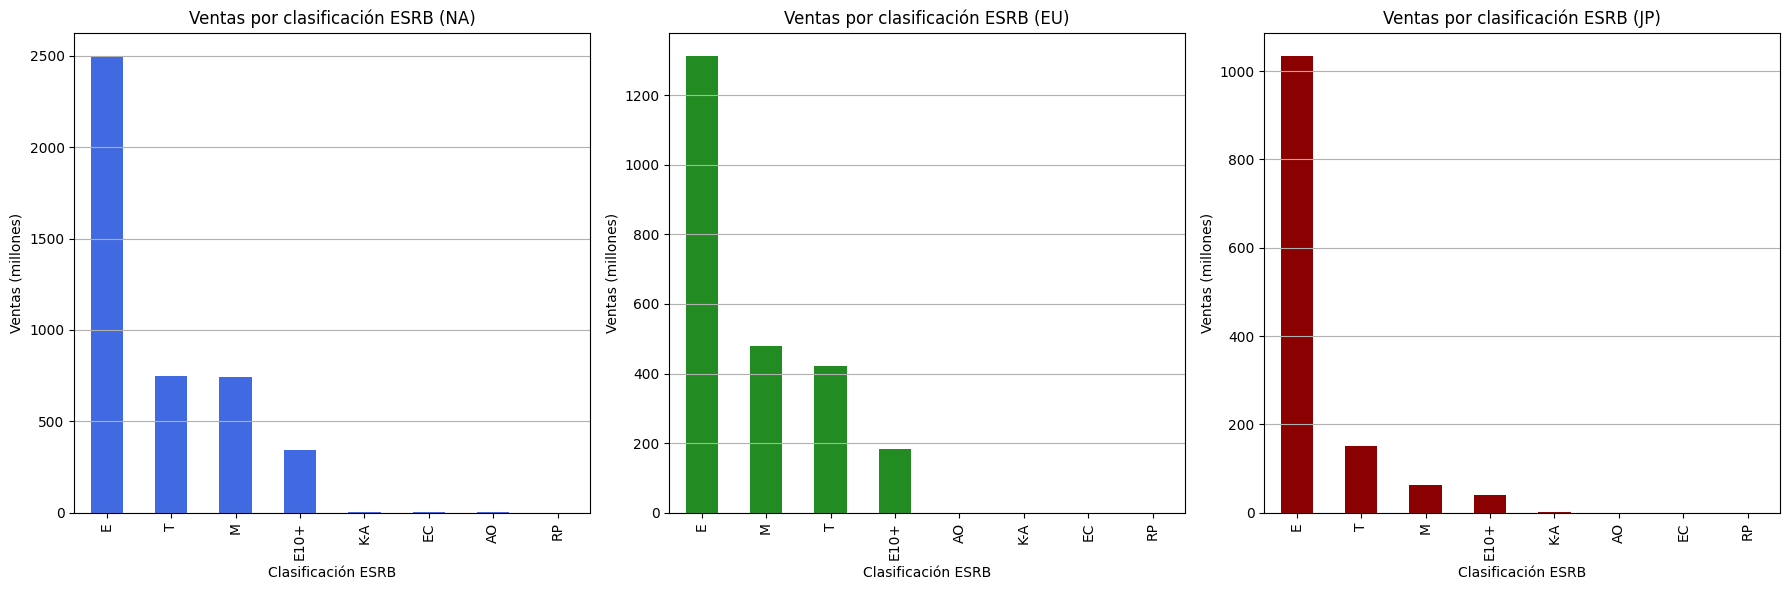

In [16]:
# Agrupamos ventas por clasificación ESRB en cada región
rating_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Gráficos comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

rating_na.plot(kind='bar', ax=axs[0], title='Ventas por clasificación ESRB (NA)', color='royalblue')
rating_eu.plot(kind='bar', ax=axs[1], title='Ventas por clasificación ESRB (EU)', color='forestgreen')
rating_jp.plot(kind='bar', ax=axs[2], title='Ventas por clasificación ESRB (JP)', color='darkred')

for ax in axs:
    ax.set_xlabel('Clasificación ESRB')
    ax.set_ylabel('Ventas (millones)')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Análisis regional del impacto ESRB en ventas:

 * Norteamérica (NA):
   - Las mayores ventas corresponden a juegos "E" (Everyone), lo que indica una fuerte preferencia por títulos familiares o accesibles para todos.
   - Las clasificaciones "T" (Teen) y "M" (Mature) también tienen una cuota considerable, lo que sugiere un mercado diverso en edades.

 * Europa (EU):
   - También lidera la clasificación "E", pero con mayor equilibrio respecto a "M" y "T".
   - Europa parece tener una tolerancia más alta hacia títulos con clasificación "M", con más ventas que en NA en términos proporcionales.

 * Japón (JP):
   - Claramente orientado a juegos con clasificación "E", lo que sugiere una preferencia por títulos aptos para todos.
   - Las clasificaciones "M" y "T" tienen ventas más reducidas en comparación con occidente, lo cual puede deberse a diferencias culturales en el consumo de contenido más maduro.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El análisis regional que presentas es detallado y demuestra una comprensión clara de las particularidades culturales y comerciales que influyen en las preferencias por plataformas, géneros y clasificaciones ESRB. Al comparar las tres regiones, logras identificar patrones relevantes como el dominio de Xbox en Norteamérica, la fuerte presencia de Sony en Europa y la supremacía de Nintendo en Japón, lo cual ofrece un marco útil para diseñar estrategias adaptadas. Además, tu lectura sobre el impacto del contenido según clasificación ESRB complementa muy bien la segmentación demográfica y cultural del público.

</div>

In [17]:
# hipotesis 1
# Filtrar y limpiar
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notnull())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notnull())]['user_score']

# Realizar prueba t de muestras independientes
alpha = 0.05
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")


Valor p: 4.3968409560037004e-05
Rechazamos la hipótesis nula


In [18]:
# hipotesis 2
# Filtrar por género
action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notnull())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notnull())]['user_score']

# Prueba t
results2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print('Valor p:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")


Valor p: 0.5696868901880056
No se puede rechazar la hipótesis nula


**Hipótesis 1: ¿Son iguales las calificaciones de usuarios para Xbox One y PC?**

- Valor p: 0.00004396  
- Resultado: Rechazamos la hipótesis nula.

- Interpretación:

La diferencia entre las calificaciones promedio otorgadas por los usuarios a juegos de Xbox One y PC es estadísticamente significativa. Con un valor p mucho menor al umbral α = 0.05, podemos concluir que estas plataformas reciben valoraciones diferentes por parte de los usuarios.

**Hipótesis 2: ¿Las calificaciones promedio de los géneros Acción y Deportes son diferentes?**

- Valor p: 0.5696  
- Resultado: No se puede rechazar la hipótesis nula.

- Interpretación:
  
No hay evidencia estadística suficiente para afirmar que las calificaciones promedio de los géneros Acción y Deportes sean diferentes. Es decir, en términos generales, los usuarios valoran estos dos géneros de forma similar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Emmanuel aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

**Conclusión general del proyecto**

Tras analizar los datos históricos de ventas de videojuegos, se identificaron tendencias clave para respaldar decisiones comerciales en 2017. Se observó que el volumen de lanzamientos alcanzó su pico en 2008, seguido de una disminución progresiva, lo que indica una industria que transita hacia una mayor concentración y calidad.

Plataformas como "PS2", "X360" y "PS3" fueron líderes históricas, pero muestran un claro declive. En cambio, "PS4" y "XOne" exhiben crecimiento reciente, convirtiéndose en las plataformas más prometedoras para futuras campañas. Además, géneros como Platform", "Shooter" y "Sports" combinan buena recepción del público y altas ventas promedio, lo que los posiciona como apuestas rentables.

Se detectaron diferencias significativas por región: en Norteamérica predomina Xbox y géneros activos como "Shooter"; en Europa, PlayStation y "Racing"; mientras que en Japón se destacan Nintendo y el género de "Rol", junto con una fuerte preferencia por juegos con clasificación ESRB de tipo "E" (Everyone).

Las pruebas de hipótesis confirmaron que las valoraciones de los usuarios varían significativamente entre plataformas (XOne vs. PC), pero no entre ciertos géneros (Acción vs. Deportes), lo que ayuda a priorizar aspectos clave para futuros lanzamientos.

En conjunto, este análisis proporciona una base sólida para planificar campañas de marketing más específicas y efectivas, enfocadas en las plataformas, géneros y regiones con mayor potencial comercial para el año 2017.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Emmanuel lograste integrar de forma muy coherente los principales hallazgos del análisis, construyendo un cierre que no solo resume sino que también orienta decisiones comerciales con base en datos relevantes.

</div>

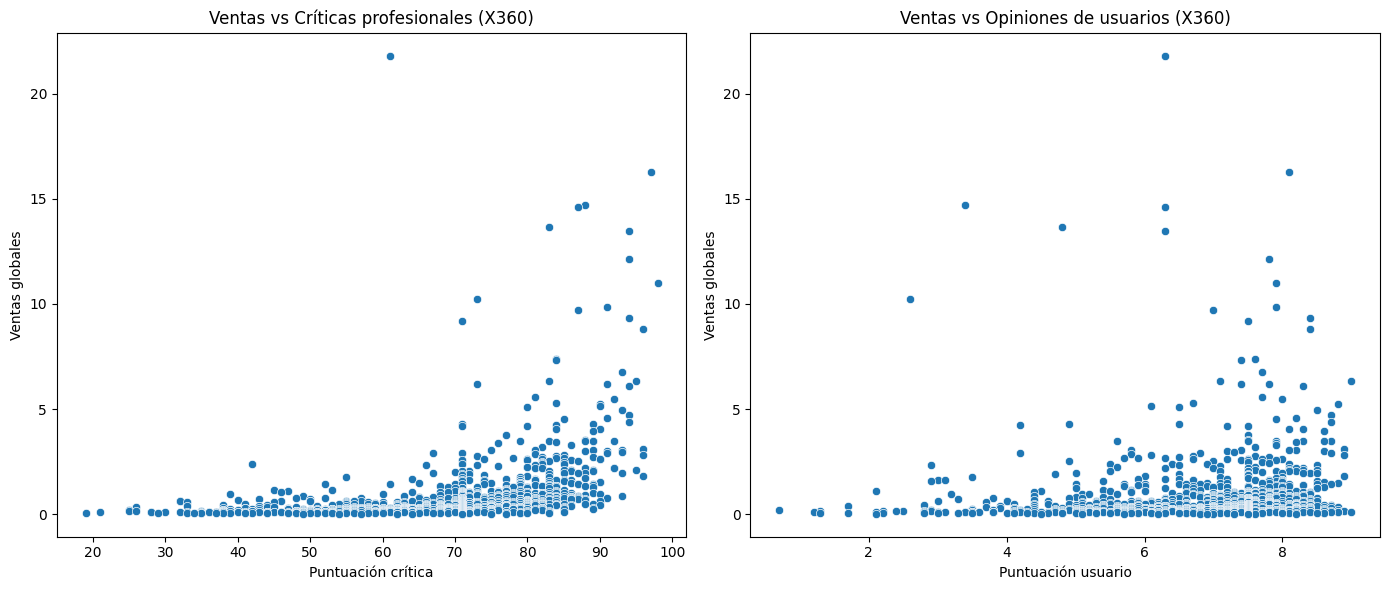

Correlación (ventas vs crítica): 0.36064948354783166
Correlación (ventas vs usuario): 0.05902838121993745


In [22]:
x360_data = df[(df['platform'] == 'X360') & 
               (df['critic_score'].notnull()) & 
               (df['user_score'].notnull())]

plt.figure(figsize=(14, 6))

# criticas profesionales vs ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=x360_data, x='critic_score', y='total_sales')
plt.title('Ventas vs Críticas profesionales (X360)')
plt.xlabel('Puntuación crítica')
plt.ylabel('Ventas globales')

# opiniones de usuarios vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=x360_data, x='user_score', y='total_sales')
plt.title('Ventas vs Opiniones de usuarios (X360)')
plt.xlabel('Puntuación usuario')
plt.ylabel('Ventas globales')

plt.tight_layout()
plt.show()

print('Correlación (ventas vs crítica):', x360_data['total_sales'].corr(x360_data['critic_score']))
print('Correlación (ventas vs usuario):', x360_data['total_sales'].corr(x360_data['user_score']))

En la plataforma Xbox 360, se observa una correlación positiva moderada entre las críticas profesionales y las ventas, lo que sugiere que mejores puntuaciones por parte de expertos tienden a asociarse con mayores ventas. En cambio, la correlación con las opiniones de usuarios es más débil o casi nula, lo que indica que las valoraciones de los jugadores no influyen significativamente en el rendimiento comercial. Esto sugiere que, para esta plataforma, las reseñas profesionales tienen mayor peso en la percepción del valor del juego y su éxito en el mercado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Tu análisis refleja una comprensión clara de cómo influyen diferentes tipos de valoraciones en el desempeño comercial de los juegos en Xbox 360. Al contrastar el impacto de las críticas profesionales con las opiniones de los usuarios, logras identificar una diferencia importante en la manera en que cada grupo contribuye a las ventas, lo cual aporta una perspectiva valiosa sobre el comportamiento del mercado en esta plataforma.

</div>